In [7]:
from collections import Counter
from collections import OrderedDict
import ConfigParser
import matplotlib.pyplot as plt
import networkx as nx
import sys
import time
from TwitterAPI import TwitterAPI
%matplotlib inline

def get_twitter(config_file):
    """ Read the config_file and construct an instance of TwitterAPI.
    Args:
      config_file ... A config file in ConfigParser format with Twitter credentials
    Returns:
      An instance of TwitterAPI.
    """
    config = ConfigParser.ConfigParser()
    config.read(config_file)
    twitter = TwitterAPI(
                   config.get('twitter', 'consumer_key'),
                   config.get('twitter', 'consumer_secret'),
                   config.get('twitter', 'access_token'),
                   config.get('twitter', 'access_token_secret'))
    return twitter


###################################################################################################  
def read_candidates(filename):
    """ Read a list of usernames for U.S. presedential candidates
    Args:
      filename: The name of the text file containing in format:
         <twitter handle> <R or D for Republican or Democrat>
    Returns:
      A list of (string, string) tuples representing each (handle, party) pair.
    """
    content= []
    with open("candidates.txt") as fileobject:
        content = [ line.split() for line in fileobject.readlines()]
    return content 
    
    

###################################################################################################  


###################################################################################################  
"""robust_request: If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request.
      params ..... A parameter dictionary for the request.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed."""
   
def robust_request(twitter, resource, params, max_tries=5):
    for i in range(max_tries):
        request = twitter.request(resource, params)
        
        if request.status_code == 200:
            return request
        else:
            print >> sys.stderr, 'Got error:', request.text, '\nsleeping for 15 minutes.'
            sys.stderr.flush()
            time.sleep(61 * 15)
###################################################################################################              
"""get_friends: Return a list of the users that this person follows on Twitter, up to 200.
    See https://dev.twitter.com/rest/reference/get/friends/list 
    Note, because of rate limits, it's best to test this method for one candidate before trying
    on all candidates.
    
    Args:
        screen_name: a string of a Twitter screen name
    Returns:
        A list of strings, one per friend.
    Note: Many users follow more than 200 accounts; we will limit ourselves to
    the first 200 accounts returned.
    """            
def get_friends(screen_name):
   
  
    request = robust_request(twitter,'friends/list',{'screen_name':screen_name , 'count': 200})
    friends = [ r['screen_name'] for r in request]
    return friends

    
###################################################################################################  
""" Get the friends for all the users in usernames.
    I.e., call get_friends for all 15 candidates.
    Args:
        screen_names: a list of Twitter screen names, one per candidate
    Returns:
        a dict mapping each candidate's username (string) to a list of his/her friends (strings)
    """

def get_all_friends(screen_names):
        return {n: get_friends(n) for n in screen_names}
################################################################################################### 

def print_num_friends(candidate2friends):
    sorteddict =OrderedDict(sorted(candidate2friends.items()))
    print [[candidate,len(friends)] for candidate, friends in sorteddict.items()]


###################################################################################################
twitter = get_twitter('twitter.cfg')

candidates = read_candidates('candidates.txt')
#print('Read %d candidates' % len(candidates))
print("\n".join(str(x) for x in candidates))

republicans = [c[0] for c in candidates if c[1] == 'R']
democrats = [c[0] for c in candidates if c[1] == 'D']
print('%d republicans, %d democrats' % (len(republicans), len(democrats)))

candidate2friends = get_all_friends(c[0] for c in candidates)

print_num_friends(candidate2friends)
Counter(candidate2friends).most_common(15)



Got error: {"errors":[{"message":"Rate limit exceeded","code":88}]} 
sleeping for 15 minutes.


['HillaryClinton', 'D']
['BernieSanders', 'D']
['MartinOMalley', 'D']
['JoeBiden', 'D']
['JimWebbUSA', 'D']
['realDonaldTrump', 'R']
['JebBush', 'R']
['RealBenCarson', 'R']
['marcorubio', 'R']
['ScottWalker', 'R']
['tedcruz', 'R']
['CarlyFiorina', 'R']
['GovMikeHuckabee', 'R']
['govchristie', 'R']
['DrRandPaul', 'R']
10 republicans, 5 democrats
15
[['BernieSanders', 200], ['CarlyFiorina', 200], ['DrRandPaul', 200], ['GovMikeHuckabee', 200], ['HillaryClinton', 200], ['JebBush', 185], ['JimWebbUSA', 200], ['JoeBiden', 7], ['MartinOMalley', 200], ['RealBenCarson', 48], ['ScottWalker', 200], ['govchristie', 200], ['marcorubio', 200], ['realDonaldTrump', 42], ['tedcruz', 200]]


[('DrRandPaul',
  [u'singernews',
   u'KenCuccinelli',
   u'hootsuite',
   u'JulieBorowski',
   u'BillKET',
   u'commun_it',
   u'seanhannity',
   u'BenSwann_',
   u'SenMikeLee',
   u'CatoInstitute',
   u'Heritage',
   u'justinamash',
   u'WDRBNews',
   u'cjnews',
   u'WYMT',
   u'jackhunter74',
   u'larry_kudlow',
   u'latimes',
   u'WashTimes',
   u'TeamCavuto',
   u'YALiberty',
   u'TPCarney',
   u'ThomasEWoods',
   u'nickgillespie',
   u'chucktodd',
   u'jaketapper',
   u'ByronYork',
   u'MattWelch',
   u'jimantle',
   u'FBNStossel',
   u'Judgenap',
   u'StreetSignsCNBC',
   u'CNBC',
   u'CNBCopinion',
   u'AP',
   u'RickSantelli',
   u'HappeningNow',
   u'CNNnewsroom',
   u'BuzzFeedBen',
   u'SenRonJohnson',
   u'FoxNewsSunday',
   u'DylanRatigan',
   u'DennisDMZ',
   u'daveweigel',
   u'FoxBusiness',
   u'DougWead',
   u'businessinsider',
   u'IJ',
   u'IngrahamAngle',
   u'GerriWillisFBN',
   u'oreillyfactor',
   u'Team_Mitch',
   u'America_Live',
   u'megynkelly',
   u'townhall

In [8]:
################################################################################################### 
""" Count how often each friend is followed.
    Args:
        candidate2friends: a dict mapping each candidate to a list of friends
    Returns:
        a Counter object mapping each friend to the number of candidates who follow them.
        Counter documentation: https://docs.python.org/dev/library/collections.html#collections.Counter
    """
def count_friends(candidate2friends):
    count=[]
    for r in candidate2friends.values():
        count.extend(r)
    return Counter(count)


friend_counts = count_friends(candidate2friends)
print friend_counts.most_common(5)


[(u'megynkelly', 7), (u'BretBaier', 7), (u'joniernst', 5), (u'jaketapper', 4), (u'oreillyfactor', 4)]


In [10]:
# Who are the most popular friends by party?
print('popular Republican friends:')
republican_counts = count_friends({k: v for k, v in candidate2friends.items() if k in republicans})
print republican_counts.most_common(5)

print('popular Democrat friends:')
democrat_counts = count_friends({k: v for k, v in candidate2friends.items() if k in democrats})
print democrat_counts.most_common(5)

popular Republican friends:
[(u'megynkelly', 7), (u'BretBaier', 7), (u'joniernst', 5), (u'oreillyfactor', 4), (u'FoxNewsSunday', 4)]
popular Democrat friends:
[(u'GovernorHassan', 2), (u'NickGass', 2), (u'UniPolitica', 2), (u'POTUS', 2), (u'TheLeadCNN', 2)]


In [11]:
# Do any candidates from one party actually follow a candidate from another party?
def bipartisan_count(republicans, democrats, candidate2friends):
    print('How many Democrats does each Republican follow?')        
    for r in republicans:
        print('%20s %d' % (r, len(set(democrats) & set(candidate2friends[r]))))
    print('How many Republicans does each Democrat follow?')        
    for d in democrats:
        print('%20s %d' % (d, len(set(republicans) & set(candidate2friends[d]))))

bipartisan_count(republicans, democrats, candidate2friends)

How many Democrats does each Republican follow?
     realDonaldTrump 0
             JebBush 0
       RealBenCarson 0
          marcorubio 0
         ScottWalker 0
             tedcruz 0
        CarlyFiorina 0
     GovMikeHuckabee 0
         govchristie 0
          DrRandPaul 0
How many Republicans does each Democrat follow?
      HillaryClinton 0
       BernieSanders 0
       MartinOMalley 0
            JoeBiden 0
          JimWebbUSA 0


In [16]:
def score_republicans(republicans, democrat_counts, candidate2friends):
    """
    Args:
        republicans...list of strings, one per Republican
        democrat_counts...string-int dict mapping each friend to the number of Democrats who follow thiem.
        candidate2friends...string-list dict mapping each candidate to their list of friends.
    Returns:
        A list of (string, int) pairs, one per Republican candidate, indicating the number
        of friends the Republican has that are also followed by at least one Democrat.
    """
    republican_score=[]
    for r in republicans:
        republican_score.append([r,len(set(democrat_counts.keys()) & set(candidate2friends[r]))])
    return sorted(republican_score, key=lambda num: num[1],reverse=True)

republican_scores = score_republicans(republicans, democrat_counts, candidate2friends)
print republican_scores

[['GovMikeHuckabee', 5], ['JebBush', 4], ['tedcruz', 3], ['govchristie', 3], ['DrRandPaul', 2], ['RealBenCarson', 1], ['ScottWalker', 1], ['CarlyFiorina', 1], ['realDonaldTrump', 0], ['marcorubio', 0]]


In [13]:
def create_graph(candidate2friends, friend_counts):
    """ Create a networkx DiGraph, adding each candidate/friend as a node. 
        Note: while all candidates should be added to the graph,
        only add friends for which friend_counts[friend] > 1. (This is to reduce clutter.)
    Args:
      candidate2friends: dict mapping each candidate to the list of friends
      friend_counts
    Returns:
      A networkx DiGraph
    """
    graph = nx.DiGraph()
    # Add a node
    for k in candidate2friends.keys():
        graph.add_node(k)
        for frnds in candidate2friends[k]: 
            if friend_counts[frnds]>1:
                graph.add_node(frnds)
                graph.add_edge(k,frnds)
    return graph
    
    
    
graph = create_graph(candidate2friends, friend_counts)
print('graph has %s nodes and %s edges' % (len(graph.nodes()), len(graph.edges())))

graph has 131 nodes and 279 edges


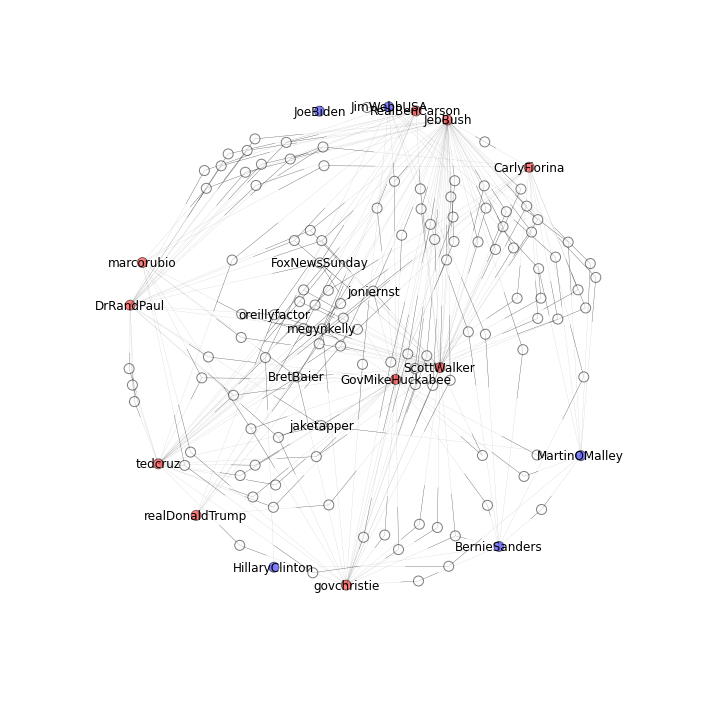

In [14]:
def get_color(name, republicans, democrats):
    if name in republicans:
        return 'r'
    elif name in democrats:
        return 'b'
    else:
        return 'w'

def draw_network(graph, republicans, democrats, candidate2friends, friend_counts):
    colors = [get_color(name, republicans, democrats) for name in graph.nodes()]
    labels = {n: n if n in candidate2friends or friend_counts[n] > 3 else '' for n in graph.nodes()}
    plt.figure(figsize=(12,12))
    nx.draw_networkx(graph, node_color=colors,
                     labels=labels, alpha=.5, width=.1,
                     node_size=100)
    plt.axis("off")
    plt.show()
    
draw_network(graph, republicans, democrats, candidate2friends, friend_counts)


In [17]:
# This will write some information to a text file, which we'll use to help grading.
# Be sure to run this code once at the end and check the resulting file (output.txt) into Github.
import json
outf = open('output.txt', 'wt')
json.dump({'candidates':republican_scores,
            'republicans': sorted(republicans),
            'democrats': sorted(democrats),
            'republican_counts': sorted(count_friends({k: v for k, v in candidate2friends.items() if k in republicans}).most_common(10)),
            'democrat_counts': sorted(count_friends({k: v for k, v in candidate2friends.items() if k in democrats}).most_common(10)),
            'num_nodes': len(graph.nodes()),
            'num_edges': len(graph.edges()),
            'republican_scores': sorted(republican_scores),
          }, outf, indent=2, sort_keys=True)
outf.close()

In [18]:
republican_scores


[['GovMikeHuckabee', 5],
 ['JebBush', 4],
 ['tedcruz', 3],
 ['govchristie', 3],
 ['DrRandPaul', 2],
 ['RealBenCarson', 1],
 ['ScottWalker', 1],
 ['CarlyFiorina', 1],
 ['realDonaldTrump', 0],
 ['marcorubio', 0]]

In [19]:
 sorted(republicans)

['CarlyFiorina',
 'DrRandPaul',
 'GovMikeHuckabee',
 'JebBush',
 'RealBenCarson',
 'ScottWalker',
 'govchristie',
 'marcorubio',
 'realDonaldTrump',
 'tedcruz']

In [20]:
sorted(democrats)

['BernieSanders', 'HillaryClinton', 'JimWebbUSA', 'JoeBiden', 'MartinOMalley']

In [21]:
sorted(count_friends({k: v for k, v in candidate2friends.items() if k in republicans}).most_common(10)),

([(u'BretBaier', 7),
  (u'BuzzFeedAndrew', 3),
  (u'FoxNewsSunday', 4),
  (u'Heritage', 3),
  (u'SpeakerBoehner', 3),
  (u'chucktodd', 3),
  (u'joniernst', 5),
  (u'megynkelly', 7),
  (u'oreillyfactor', 4),
  (u'seanhannity', 3)],)